In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

# Data Collection

Collectin of Data

In [2]:
titanic = pd.read_csv('titanic_train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.shape

(891, 12)

In [5]:
len(titanic.index)

891

# Analysing data

Creating various plot to establish the relationship between the vaiables

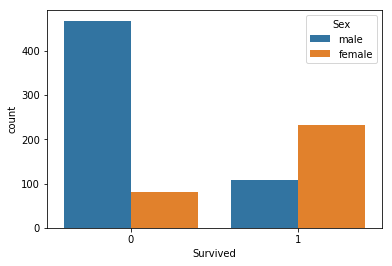

In [6]:
sns.countplot('Survived',data=titanic,hue='Sex')

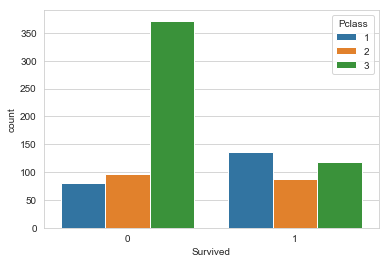

In [7]:
pd.set_figsize
sns.set_style('whitegrid')
sns.countplot('Survived',data=titanic,hue='Pclass')

C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


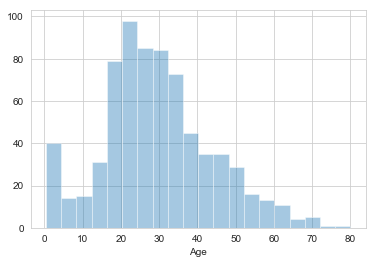

In [8]:
sns.distplot(titanic['Age'].dropna(),kde=False)

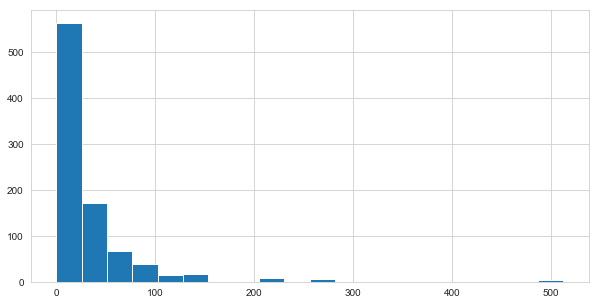

In [9]:
titanic['Fare'].hist(bins=20,figsize=(10,5))

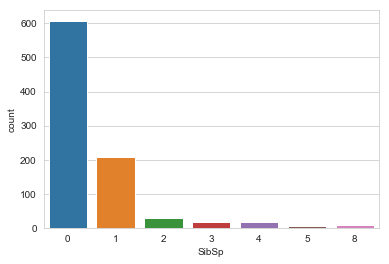

In [10]:
sns.countplot('SibSp',data=titanic)

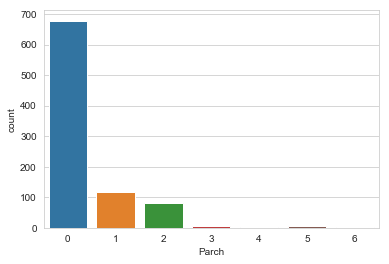

In [11]:
sns.countplot('Parch',data=titanic)

# Data Wrangling : Cleaning the Data

Removing the NAn or Null value

In [12]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

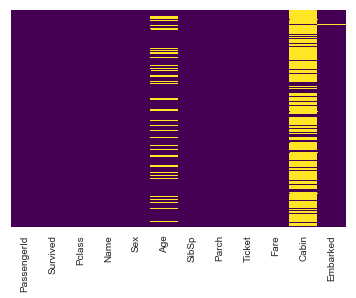

In [13]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

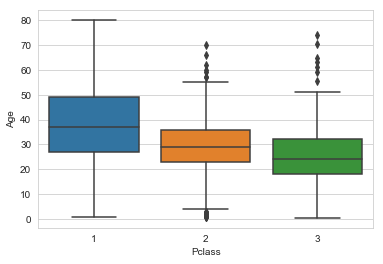

In [14]:
sns.boxplot(x='Pclass',y='Age',data=titanic)

In [15]:
def impute_Age(cols):
   Age = cols[0]
   Pclass = cols[1]
   if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
        
   else:        
        return Age

In [16]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_Age,axis=1)

In [17]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
titanic.drop('Cabin',inplace=True,axis=1)

In [19]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
titanic.dropna(inplace=True)

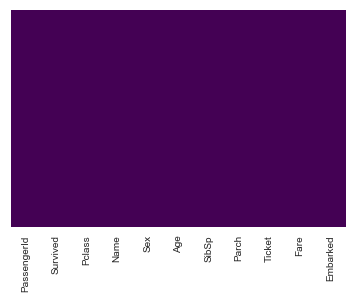

In [21]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [23]:
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [24]:
PCL = pd.get_dummies(titanic['Pclass'],drop_first=True)
PCL.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [25]:
titanic = pd.concat([titanic,sex,embark,PCL],axis=1)

In [26]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [27]:
titanic.drop(['Sex','Name','Embarked','Pclass','PassengerId','Ticket'],axis=1,inplace=True)

In [28]:
titanic.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


# Training and Testing the data

In [29]:
x = titanic.drop('Survived',axis=1)
y = titanic.Survived

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3,random_state=1)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
predictions = model.predict(x_test)

In [35]:
from sklearn.metrics import classification_report

In [36]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.86      0.89      0.88       166\n           1       0.80      0.77      0.79       101\n\n   micro avg       0.84      0.84      0.84       267\n   macro avg       0.83      0.83      0.83       267\nweighted avg       0.84      0.84      0.84       267\n'

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(y_test,predictions)

array([[147,  19],
       [ 23,  78]], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test,predictions)

0.8426966292134831

# SUV Predictions

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [42]:
suv = pd.read_csv('suv_data.csv')

In [43]:
suv.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [44]:
suv.isnull().sum()   #no null values

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [45]:
len(suv.index)

400

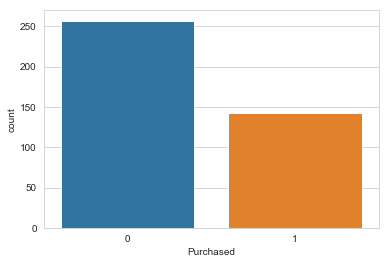

In [46]:
sns.countplot('Purchased',data=suv)

The above plot shows those who've purchased the SUV are 1 and who did'nt as 0

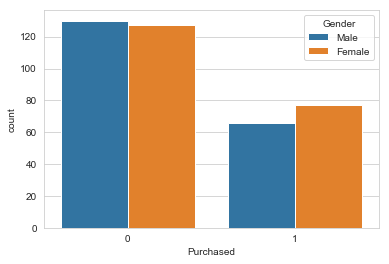

In [47]:
sns.countplot('Purchased',data=suv,hue='Gender')

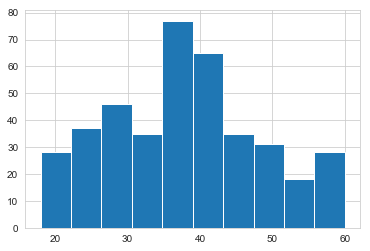

In [48]:
suv['Age'].hist()

In [49]:
suv.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


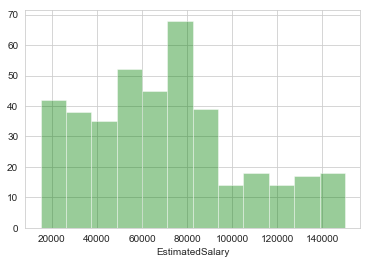

In [50]:
sns.distplot(suv['EstimatedSalary'],kde=False,color='green')

In [51]:
gender = pd.get_dummies(suv['Gender'],drop_first=True)

In [52]:
gender.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [53]:
suv  = pd.concat([suv,gender],axis=1)

In [54]:
suv.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [55]:
suv.drop('Gender',axis=1,inplace=True)

In [56]:
suv.head()

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [57]:
suv.drop('User ID',axis=1,inplace=True)

In [58]:
suv.dropna(axis=1).head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


This is the above data we need to use for test and train

In [59]:
x = suv.drop('Purchased',axis=1)
y = suv.Purchased

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=1)

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
model = LogisticRegression()

In [64]:
model.fit(x_train,y_train)

C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [65]:
predictions = model.predict(x_test)

In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
confusion_matrix(y_test,predictions)

array([[69,  3],
       [47,  1]], dtype=int64)

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
accuracy_score(y_test,predictions)

0.5833333333333334

its very less accurate , now doing with differet method 

In [70]:
suv.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [71]:
x = suv.iloc[:,:2]
y = suv.iloc[:,2]

In [72]:
from sklearn.model_selection import train_test_split

In [99]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [100]:
from sklearn.preprocessing import StandardScaler

In [118]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.fit_transform(x_test)

In [102]:
from sklearn.linear_model import LogisticRegression

In [111]:
model = LogisticRegression(random_state=0)

In [112]:
model.fit(x_train,y_train)

C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [113]:
predictions  = model.predict(x_test)

In [114]:
from sklearn.metrics import confusion_matrix

In [115]:
confusion_matrix(y_test,predictions)

array([[74,  5],
       [ 9, 32]], dtype=int64)

In [116]:
from sklearn.metrics import accuracy_score

In [117]:
accuracy_score(y_test,predictions)*100

88.33333333333333